### KNN for Handling the missing values

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [16]:
df = pd.read_csv("E:/Python and ML/Dataset/Titanic dataset.csv", usecols = ["Age", "Pclass","Fare","Survived"])

In [17]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,34.5,7.8292
1,1,3,47.0,7.0000
2,0,2,62.0,9.6875
3,0,3,27.0,8.6625
4,1,3,22.0,12.2875


In [18]:
df.isnull().mean() * 100

Survived     0.000000
Pclass       0.000000
Age         20.574163
Fare         0.239234
dtype: float64

In [19]:
scaler = StandardScaler()
scaler.fit(df.drop("Survived", axis = 1))

,copy,True
,with_mean,True
,with_std,True


In [20]:
scaler_fit = scaler.transform(df.drop("Survived", axis = 1))

In [26]:
df_scaler = pd.DataFrame(scaler_fit,columns = df.columns[1:])
df_scaler

,Pclass,Age,Fare
0,0.873482,0.298549,-0.497811
1,0.873482,1.181328,-0.512660
2,-0.315819,2.240662,-0.464532
3,0.873482,-0.231118,-0.482888
4,0.873482,-0.584229,-0.417971
...,...,...,...
413,0.873482,NaN,-0.493856
414,-1.505120,0.616350,1.312180
415,0.873482,0.581038,-0.508183
416,0.873482,NaN,-0.493856


In [27]:
df_scaler.isnull().mean() * 100

Pclass     0.000000
Age       20.574163
Fare       0.239234
dtype: float64

In [28]:
X = df_scaler
Y = df["Survived"]

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=23)

In [32]:
knn = KNNImputer(n_neighbors= 3, weights="distance")
X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.fit_transform(X_test)



In [33]:
lr = LogisticRegression()
lr.fit(X_train_trf,Y_train)
Y_pred = lr.predict(X_test_trf) 
accuracy_score(Y_test, Y_pred) 

0.6547619047619048

In [34]:
print(confusion_matrix(Y_test,Y_pred))

[[52  0]
 [29  3]]


In [35]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        52
           1       1.00      0.09      0.17        32

    accuracy                           0.65        84
   macro avg       0.82      0.55      0.48        84
weighted avg       0.78      0.65      0.55        84



In [47]:
knn_1 = KNeighborsClassifier(n_neighbors=5)

In [48]:
knn_1.fit(X_train_trf, Y_train)
pred_1 = knn_1.predict(X_test_trf)

In [49]:
accuracy_score(Y_test, pred_1) 

0.7023809523809523

In [44]:
error_rate = []

for i in range(1,40):
    knn_1 = KNeighborsClassifier(n_neighbors=i)
    knn_1.fit(X_train_trf,Y_train)
    pred_i = knn_1.predict(X_test_trf)
    error_rate.append(np.mean(pred_i != Y_test)) 

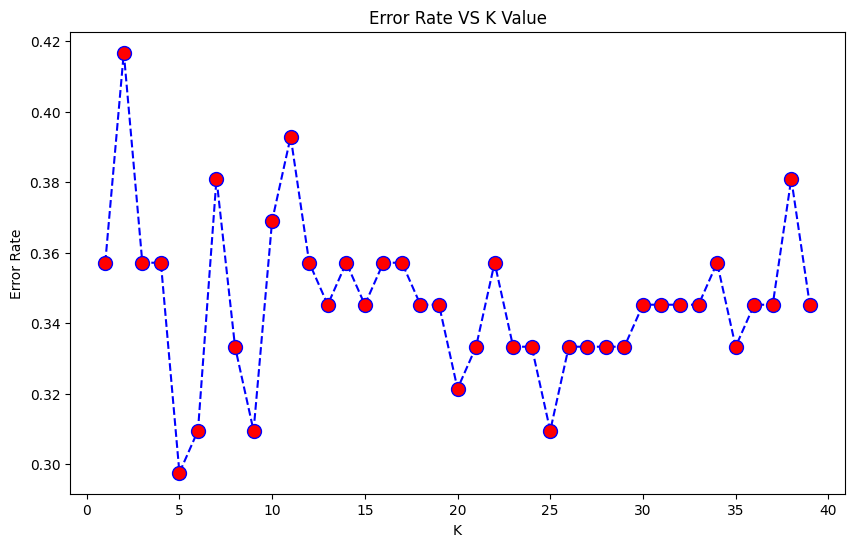

In [46]:
plt.figure(figsize= (10,6))
plt.plot(range(1,40),error_rate,color ="blue", linestyle = 'dashed', marker = 'o',markerfacecolor="red", markersize = 10)

plt.title("Error Rate VS K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()